<h1>Load Tokenizer and Instantiate Model</h1>

In [9]:
from lstm_model import LSTMModule
import torch
import sentencepiece as spm
from transformers import BertTokenizer  # Or any other tokenizer you prefer

# Trained tokenizer
sp = spm.SentencePieceProcessor()
model_prefix = "bpe_tokenizer"
sp.load(f'{model_prefix}.model')
tokenizer = sp

device = "mps"

<h1>Instantiate New Model</h1>

Uncomment the code below to train a new model

In [10]:
# lstm_model = LSTMModule(tokenizer.get_piece_size())
# lstm_model.to(device)

<h1>Load Model</h1>

Uncomment the code below to use the pre-existing model parameters

In [11]:
import torch
import sentencepiece as spm
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_NAME = "lstm_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

lstm_model = LSTMModule(sp.get_piece_size()).to("mps")

# Load the saved state_dict of module_0 
lstm_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

<h1>Train Model</h1>

In [12]:
from textdataset import TextDataSet
import os

training_losses, validation_losses = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).train_model(lstm_model)

Epoch 1, Training Loss: 5.1058 | Validation loss: 5.1119
Epoch 2, Training Loss: 5.0855 | Validation loss: 5.1089
Epoch 3, Training Loss: 5.0719 | Validation loss: 5.1058

Train time: 125.896 seconds


<h1>Visualize</h1>

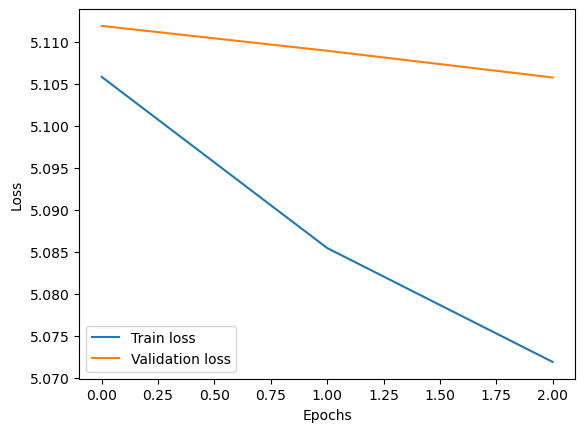

In [13]:
import matplotlib.pyplot as plt
# plot the loss curves
plt.plot(training_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

<h1>Save Model</h1>

In [14]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "lstm_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=lstm_model.state_dict(),f=MODEL_SAVE_PATH)
print("saving complete")

saving complete


<h1>Evaluate Model</h1>

In [15]:
from textdataset import TextDataSet
import os

tds = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).evalutate_model(lstm_model)

Perplexity: 184.22808837890625 | Bleu score: 0.00420349217848004


<h1>Generate from prompts</h1>

In [16]:
# Example usage of the generate method
prompt = "Do you prefer pizza or hamburgers?"
generated_text = lstm_model.generate(sp, prompt, max_length=50, eos_token_id=2, temperature=0.8, device="mps")
print(f"Generated text: {generated_text}")

Generated text: She will to be in many level in our petition, he seemed still just more but he stayed by it, because the stock, always, those lively made her clothes of Boish of justice. I are, myd. Fernand you do. T
